# Assignment 5
In this assignment, we will go through Perceptron, Linear Classifiers, Loss Functions, Gradient Descent, Back Propagation, Neural Networks and Convulutional Neural Networks.


PS. this one is not from Stanford's course.



\

## Instructions
* This notebook contain blocks of code, you are required to complete those blocks(where required)
* You are required to copy this notebook ("copy to drive" above) and complete the code.
* For Submission, You'll be required to submit a sharable link for your copy of this notebook. (DO NOT CHANGE THE NAME OF THE FUNCTIONS)

# Part 1: Perceptron
In this section, we will see how to implement a perceptron. Goal would be for you to delve into the mathematics.


## Intro
What's a perceptron? It's an algorithm modelled on biological computational model to classify things into binary classes. It's a supervides learning algorithm, meaning that you need to provide labelled data containing features and the actual classifications. A perceptron would take these features as input and spit out a binary value (0 or 1). While training the model with training data, we try to minimise the error and learn the parameters involved.

**How does it work?**\
A perceptron is modelled on a biological neuron. A neuron has input dendrites and the output is carried by axons. Similarly, a perceptron takes inputs called "features". After processing, a perceptron gives output. For computation, it has a "weight" vector which is multipled with feature vector. An activation function is added to introduce some non linearities and the output is given out.\
It can be represented as: $$  f=\sum_{i=1}^{m} w_ix_i +b$$

Let's implement this simple function to give an output.



In [ ]:
import numpy as np

class perceptron():
    def __init__(self,num_input_features=8):
        self.weights = np.random.randn(num_input_features)
        self.bias = np.random.random()

    def activation(self,x):
        '''
            Implement heavside step activation function here (google ;))
        '''
        pass
        return (x>0 and 1) or 0

    def forward(self,x: np.ndarray):
        '''
            you have random initialized weights and bias
            you can access then using `self.weights` and `self.bias`
            you should use activation function before returning
        
            x : input features
            return : a binary value as the output of the perceptron 
        '''
        # YOUR CODE HERE
        p = np.dot(x.T, self.weights) + self.bias
        act = self.activation(p)
        pass
        # YOUR CODE HERE
        return act

In [ ]:
np.random.seed(0)
perc = perceptron(8)
assert perc.forward(np.arange(8))==1

# Part 2: Linear Classifier
In this section, we will see how to implement a linear Classifier.


## Intro


**How does it work?**

Linear Classifier uses the following function: $$Y = WX+b$$ Where, $W$ is a 2d array of weights with shape (#features, #classes).


Let's implement this classifier.



In [ ]:
import numpy as np

class LinearClassifier():
    def __init__(self,num_input_features=32,num_classes=5):
        self.weights = np.random.randn(num_input_features,num_classes)
        self.bias = np.random.rand(num_classes)

    def forward(self,x: np.ndarray):
        '''
            x: input features
            you have random initialized weights and bias
            you can access then using `self.weights` and `self.bias`
            return an output vector of num_classes size
        '''
        # YOUR CODE HERE
        Y = np.dot(x, self.weights) + self.bias
        pass
        # YOUR CODE HERE
        return Y

In [ ]:
np.random.seed(0)
lc = LinearClassifier()
lc.forward(np.random.rand(1,32))
# Should be close to:
# array([[ 1.30208164,  5.58136003,  0.87793013, -4.7332119 ,  4.81172123]])

array([[ 1.30208164,  5.58136003,  0.87793013, -4.7332119 ,  4.81172123]])

# Part 3: Loss Functions, Gradient descent and Backpropagation




## Intro

Loss Functions tells how "off" the output od our model is. Based upon the application, you can use several different loss functions. Formally, A loss function is a function $L:(z,y)\in\mathbb{R}\times Y\longmapsto L(z,y)\in\mathbb{R}$ that takes as inputs the predicted value $z$ corresponding to the real data value yy and outputs how different they are We'll implement L1 loss, L2 loss, Logistic loss, hinge loss and cross entropy loss functions.

### **L1 loss**
L1 loss is the linear loss function  $L = \dfrac{1}{2}(y−z) $



In [ ]:
import numpy as np
def L1Loss(z,y):
    '''
        y : True output.
        z : Predicted output.
        return : L
    '''
    L = (1/2)*(y-z)
    pass
    return L

### **L2 loss**
L2 loss is the quadratic loss function or the least square error function  $L = \dfrac{1}{2}(y−z)^2 $



In [ ]:
import numpy as np
def L2Loss(z,y):
    '''
        y : True output. 
        z : Predicted output. 
        return : L
    '''
    L = (1/2)*np.power(y-z,2)
    pass
    return L

### **Hinge Loss**
Hinge loss is: $ L = max( 0, 1 - yz ) $

In [ ]:
import numpy as np
def hingeLoss(z,y):
    '''
        y : True output. 
        z : Predicted output. 
        return : L
    '''
    L = np.maximum(0, 1-y*z)
    pass
    return L


### **Cross Entropy Loss**
Another very famous loss function is Cross Entropy loss: $ L = −[ylog(z)+(1−y)log(1−z)] $.

In [ ]:
import numpy as np
def CELoss(z,y):
    '''
        y : True output. 
        z : Predicted output. 
        return : L
    '''
    L = -1*(y*np.log(z) + (1-y)*np.log(1-z))
    pass
    return L

### **0-1 Loss**
Loss Function used by perceptron is: $ \begin{cases} 
      0=z-y & z=y \\
      1=\dfrac{z-y}{z-y} & z\neq y
   \end{cases} $.

In [ ]:
import numpy as np
def zeroOneLoss(z,y):
    '''
        y : True output. 
        z : Predicted output. 
        return : L
    '''
    L = np.zeros(y.shape)
    x = z-y
    L[x[:,0] != 0] = 1
    pass
    return L

## Cost Function
The cost function $J$ is commonly used to assess the performance of a model, and is defined with the loss function $L$ as follows:
$$\boxed{J(\theta)=\sum_{i=1}^mL(h_\theta(x^{(i)}), y^{(i)})}$$
where $h_\theta$ is the hypothesis function i.e. the function used to predict the output.

In [ ]:
lossFunctions = {
    "l1" : L1Loss,
    "l2" : L2Loss,
    "hinge" : hingeLoss,
    "cross-entropy" : CELoss,
    "0-1" : zeroOneLoss
}

def cost(Z : np.ndarray, Y : np.ndarray, loss : str):
    '''
        Z : a numpy array of predictions.
        Y : a numpy array of true values.
        return : A numpy array of costs calculated for each example.
    '''
    loss_func = lossFunctions[loss]
    # YOUR CODE HERE
    J = loss_func(z, y)
    # YOUR CODE HERE
    pass

## Gradient Descent and Back Propagation
Gradient Descent is an algorithm that minimizes the loss function by calculating it's gradient. By noting $\alpha\in\mathbb{R}$ the learning rate, the update rule for gradient descent is expressed with the learning rate $\alpha$ and the cost function $J$ as follows:

$$\boxed{ W \longleftarrow W -\alpha\nabla J( W )}$$
​


But we need to find the partial derivative of Loss function wrt every parameter to know what is the slight change that we need to apply to our parameters. This becomes particularly hard if we have more than 1 layer in our algorithm. Here's where **Back Propagation** comes in. It's a way to find gradients wrt every parameter using the chain rule. Backpropagation is a method to update the weights in the neural network by taking into account the actual output and the desired output. The derivative with respect to weight ww is computed using chain rule and is of the following form:

$$\boxed{\frac{\partial L(z,y)}{\partial w}=\frac{\partial L(z,y)}{\partial a}\times\frac{\partial a}{\partial z}\times\frac{\partial z}{\partial w}}$$
​
 
As a result, the weight is updated as follows:

$$\boxed{w\longleftarrow w-\alpha\frac{\partial L(z,y)}{\partial w}}$$

So, In a neural network, weights are updated as follows:

* Step 1: Take a batch of training data.
* Step 2: Perform forward propagation to obtain the corresponding loss.
* Step 3: Backpropagate the loss to get the gradients.
* Step 4: Use the gradients to update the weights of the network.
​
 
Now, Assuming that you know Back Propagation (read a bit about it, if you don't), we'll now implement a 3 layer digit classifier.

In [ ]:
# Get MNIST dataset
from sklearn.datasets import fetch_openml
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

x, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = (x/255).astype('float32')
Y = to_categorical(y)

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.15, random_state=42)

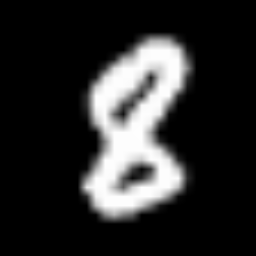

label:  8


In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Let's display 1 image from this data set
index = np.random.choice(x.shape[1])
test_img = cv2.resize(x[index].reshape(28,28),(256,256))
test_label = y[index]
cv2_imshow(test_img)
print("label: ",test_label)

In [ ]:
import numpy as np
import time

class Classifier():
    def __init__(self, sizes, epochs=10, l_rate=0.01):
        self.sizes = sizes
        self.epochs = epochs
        self.l_rate = l_rate

        # we save all parameters in the neural network in this dictionary
        self.params = self.initialization()

    def sigmoid(self, x, derivative=False):
        if derivative:
            return (np.exp(-x))/((np.exp(-x)+1)**2)
        return 1/(1+np.exp(-1*x))

    def softmax(self, x, derivative=False):
        # Numerically stable with large exponentials
        exps = np.exp(x - x.max())
        if derivative:
            return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
        return np.exp(x)/(np.sum(np.exp(x),axis=0))

    def initialization(self):
        # number of nodes in each layer
        input_layer=self.sizes[0]
        hidden_1=self.sizes[1]
        hidden_2=self.sizes[2]
        output_layer=self.sizes[3]

        params = {
            'W1':np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
            'W2':np.random.randn(hidden_2, hidden_1) * np.sqrt(1. / hidden_2),
            'W3':np.random.randn(output_layer, hidden_2) * np.sqrt(1. / output_layer)
        }

        return params

    def forward_pass(self, x_train):
        params = self.params

        # input layer activations becomes sample
        params['A0'] = x_train

        # input layer to hidden layer 1
        params['Z1'] = np.dot(params['W1'], params['A0']) 
        params['A1'] = self.sigmoid(params['Z1'])

        # hidden layer 1 to hidden layer 2
        params['Z2'] = np.dot(params['W2'], params['A1'])
        params['A2'] = self.sigmoid(params['Z2'])

        # hidden layer 2 to output layer
        params['Z3'] = np.dot(params['W3'], params['A2'])
        params['A3'] = self.softmax(params['Z3'])

        return params['A3']

    def backward_pass(self, y_train, output):
        '''
            This is the backpropagation algorithm, for calculating the updates
            of the neural network's parameters.
        '''
        params = self.params
        change_w = {}

        # Calculate W3 update
        error = 2 * (output - y_train) / output.shape[0] * self.softmax(params['Z3'], derivative=True)
        change_w['W3'] = np.outer(error, params['A2'])

        # Calculate W2 update
        error = np.dot(params['W3'].T, error)*self.sigmoid(params['Z2'], derivative=True)
        change_w['W2'] = np.outer(error, params['A1'])

        # Calculate W1 update
        error = np.dot(params['W2'].T, error)*self.sigmoid(params['Z1'], derivative=True)
        change_w['W1'] = np.outer(error, params['A0'])

        return change_w

    def update_network_parameters(self, changes_to_w):
        '''
            Update network parameters according to update rule from
            Stochastic Gradient Descent.

            θ = θ - η * ∇J(x, y), 
                theta θ:            a network parameter (e.g. a weight w)
                eta η:              the learning rate
                gradient ∇J(x, y):  the gradient of the objective function,
                                    i.e. the change for a specific theta θ
        '''
        
        for key, value in changes_to_w.items():
            self.params[key] -= self.l_rate*value

    def compute_accuracy(self, x_val, y_val):
        '''
            This function does a forward pass of x, then checks if the indices
            of the maximum value in the output equals the indices in the label
            y. Then it sums over each prediction and calculates the accuracy.
        '''
        predictions = []

        for x, y in zip(x_val, y_val):
            output = self.forward_pass(x)
            pred = np.argmax(output)
            predictions.append(pred == np.argmax(y))
        
        return np.mean(predictions)

    def train(self, x_train, y_train, x_val, y_val):
        '''
            complete this function to train the model. Calculate predictions,
            calculate changes to w, update parameters in the training loop.
            Wee are using Stocastic Gradient Descent here
        '''
        start_time = time.time()
        for iteration in range(self.epochs):
            for x,y in zip(x_train, y_train):
                # YOUR CODE HERE
                a3 = self.forward_pass(x)
                grad_w = self.backward_pass(y, a3)
                self.update_network_parameters(grad_w)

                pass
                # YOUR CODE HERE
            accuracy = self.compute_accuracy(x_val, y_val)
            print('Epoch: {0}, Time Spent: {1:.2f}s, Accuracy: {2:.2f}%'.format(
                iteration+1, time.time() - start_time, accuracy * 100
            ))

In [ ]:
dnn = Classifier(sizes=[784, 128, 128, 10],l_rate=0.1,epochs=5)
dnn.train(x_train, y_train, x_val, y_val)

Epoch: 1, Time Spent: 58.62s, Accuracy: 89.30%
Epoch: 2, Time Spent: 118.32s, Accuracy: 91.78%
Epoch: 3, Time Spent: 178.44s, Accuracy: 92.94%
Epoch: 4, Time Spent: 237.78s, Accuracy: 93.71%
Epoch: 5, Time Spent: 297.16s, Accuracy: 94.38%
